In [244]:
## Herramientas para trabajar el dato
import pandas as pd
import numpy as np


## Herramientas de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [245]:
clientes_csv = pd.read_csv('Datasets/Clientes.csv',delimiter=';')
compra_csv = pd.read_csv('Datasets/Compra.csv',delimiter=',')
gasto_csv = pd.read_csv('Datasets/Gasto.csv',delimiter=',')
localidades_csv = pd.read_csv('Datasets/Localidades.csv',delimiter=',')
proveedores_csv = pd.read_csv('Datasets/Proveedores.csv',delimiter=',')
sucursales_csv = pd.read_csv('Datasets/Sucursales.csv',delimiter=';')
venta_csv = pd.read_csv('Datasets/Venta.csv',delimiter=',')



In [246]:
compra_csv.shape[1]


9

In [247]:
def analisis_csv_general(csv):
    cantidad_columnas = 0
    valores_faltantes = 0
    outliers = 0
    sin_errores = 0
    for column in csv:

        if csv[column].dtype == 'O':    
            valores_faltantes = valores_faltantes + round((csv[column].isnull().sum() * 100) / csv[column].count(),2 )     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = sin_errores + round(100 - valores_faltantes,2)
            outliers = outliers + 0
        else:
            minimo = csv[column].mean() - 3*csv[column].std()          ## VARIABLES PARA CALCULAR OUTLIER 
            maximo = csv[column].mean() + 3*csv[column].std()
            outliers =  outliers + round((((csv[column][csv[column] < minimo].count() + csv[column][csv[column] > maximo].count())) * 100) / csv[column].count(),2)   ## REGLA 3 SIGMAS PARA OUTLIERS
            valores_faltantes = valores_faltantes + round((csv[column].isnull().sum() * 100) / csv[column].count(),2)     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
        cantidad_columnas = cantidad_columnas + 1
    
    outliers = round(outliers/cantidad_columnas,2)
    valores_faltantes = round(valores_faltantes/cantidad_columnas,2)
    sin_errores = round(100 - valores_faltantes - outliers,2)

    lista = [outliers,valores_faltantes,sin_errores]    

        ##   CONFIGURACION DEL GRAFICO 
    plt.figure(figsize=(8,8))
    plt.title('Calidad de '+column)
    graph = plt.bar(['outliers','valores_faltantes','sin_errores'],lista)
    i = 0
    for p in graph:           ## AGREGA EL NUMERO CON EL PORCENTAJE
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
            y+height*1.01,
            str(lista[i])+'%',
            ha='center',
            weight='bold')
        i+=1
        
    plt.show()
        
    
    print('Porcentaje de valores faltantes en la columna','csv','es :',valores_faltantes,'%')
    print('Porcentaje de outliers en la columna','csv','es :',outliers,'%')
    print('Porcentaje de valores sin error en la columna','csv','es :',sin_errores,'%')
    print('---------------------------------------------------')

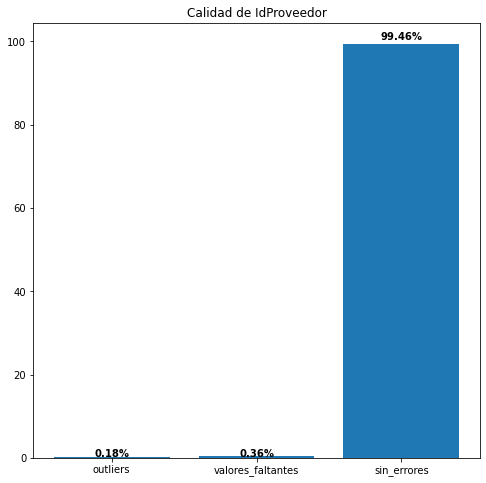

Porcentaje de valores faltantes en la columna csv es : 0.36 %
Porcentaje de outliers en la columna csv es : 0.18 %
Porcentaje de valores sin error en la columna csv es : 99.46 %
---------------------------------------------------


In [248]:
analisis_csv_general(compra_csv)

In [249]:
def analisis_csv(csv):
    for column in csv:
        
        if csv[column].dtype == 'O':    
            valores_faltantes = round((csv[column].isnull().sum() * 100) / len(csv),2 )     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = round(100 - valores_faltantes,2)
            outliers = 0
        else:
            minimo = csv[column].mean() - 3*csv[column].std()          ## VARIABLES PARA CALCULAR OUTLIER 
            maximo = csv[column].mean() + 3*csv[column].std()
            outliers =  round((((len(csv[column][csv[column] < minimo]) + len(csv[column][csv[column] > maximo]))) * 100) / len(csv),2)   ## REGLA 3 SIGMAS PARA OUTLIERS
            valores_faltantes = round((csv[column].isnull().sum() * 100) / len(csv),2)     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = round(100 - valores_faltantes - outliers,2)

        lista = [outliers,valores_faltantes,sin_errores]    

        ##   CONFIGURACION DEL GRAFICO 
        plt.figure(figsize=(8,8))
        plt.title('Calidad de '+column)
        graph = plt.bar(['outliers','valores_faltantes','sin_errores'],lista)
        i = 0
        for p in graph:           ## AGREGA EL NUMERO CON EL PORCENTAJE
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            plt.text(x+width/2,
                y+height*1.01,
                str(lista[i])+'%',
                ha='center',
                weight='bold')
            i+=1
        
        plt.show()
        
    
        print('Porcentaje de valores faltantes en la columna',column,'es :',valores_faltantes,'%')
        print('Porcentaje de outliers en la columna',column,'es :',outliers,'%')
        print('Porcentaje de valores sin error en la columna',column,'es :',sin_errores,'%')
        print('---------------------------------------------------')

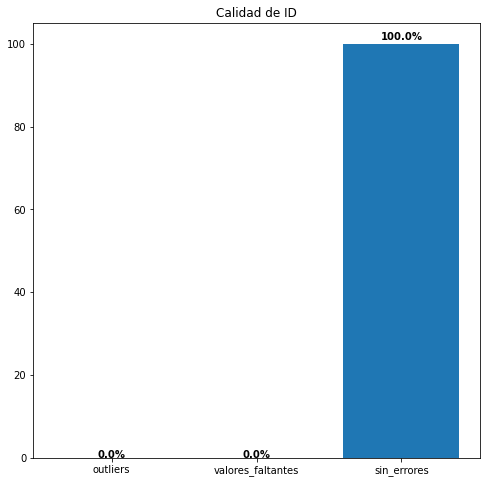

Porcentaje de valores faltantes en la columna ID es : 0.0 %
Porcentaje de outliers en la columna ID es : 0.0 %
Porcentaje de valores sin error en la columna ID es : 100.0 %
---------------------------------------------------


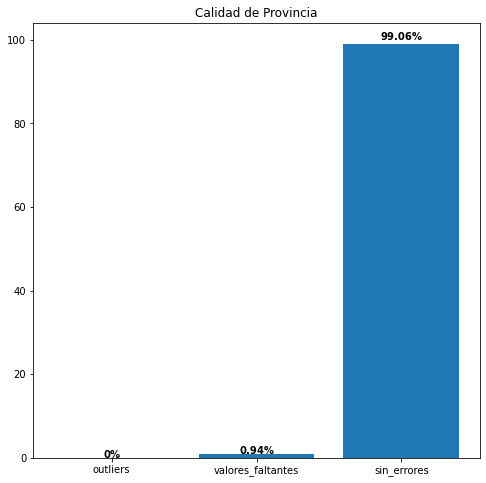

Porcentaje de valores faltantes en la columna Provincia es : 0.94 %
Porcentaje de outliers en la columna Provincia es : 0 %
Porcentaje de valores sin error en la columna Provincia es : 99.06 %
---------------------------------------------------


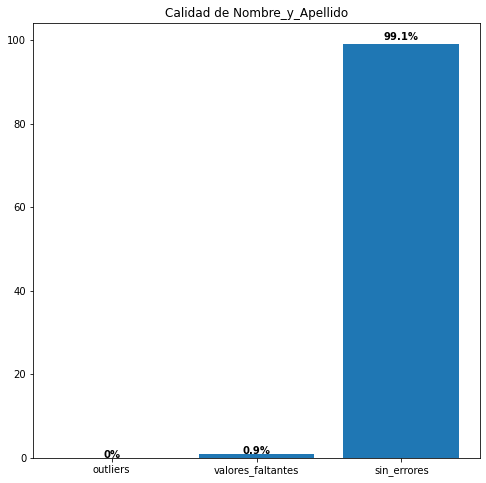

Porcentaje de valores faltantes en la columna Nombre_y_Apellido es : 0.9 %
Porcentaje de outliers en la columna Nombre_y_Apellido es : 0 %
Porcentaje de valores sin error en la columna Nombre_y_Apellido es : 99.1 %
---------------------------------------------------


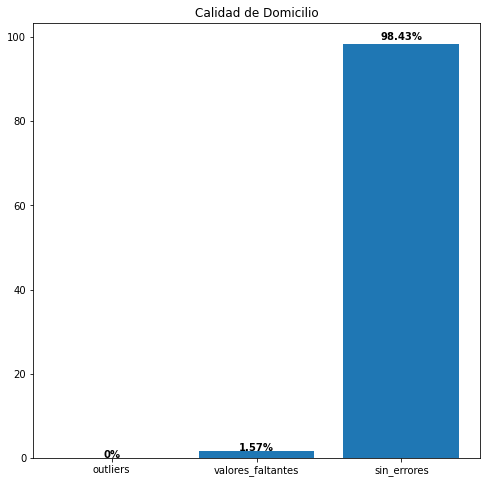

Porcentaje de valores faltantes en la columna Domicilio es : 1.57 %
Porcentaje de outliers en la columna Domicilio es : 0 %
Porcentaje de valores sin error en la columna Domicilio es : 98.43 %
---------------------------------------------------


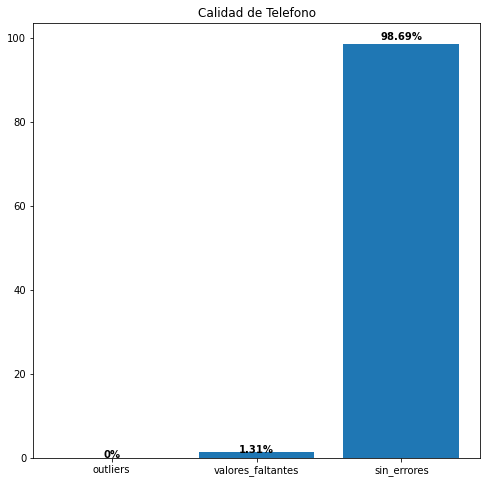

Porcentaje de valores faltantes en la columna Telefono es : 1.31 %
Porcentaje de outliers en la columna Telefono es : 0 %
Porcentaje de valores sin error en la columna Telefono es : 98.69 %
---------------------------------------------------


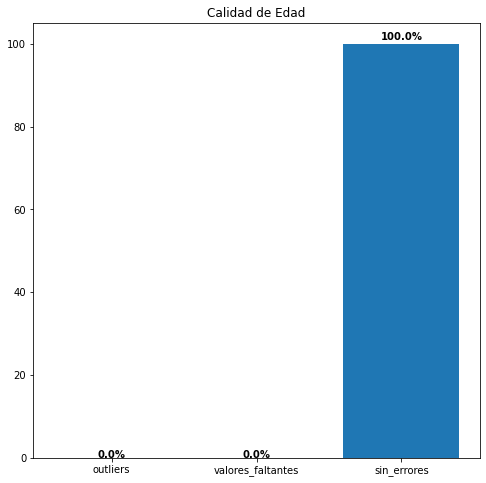

Porcentaje de valores faltantes en la columna Edad es : 0.0 %
Porcentaje de outliers en la columna Edad es : 0.0 %
Porcentaje de valores sin error en la columna Edad es : 100.0 %
---------------------------------------------------


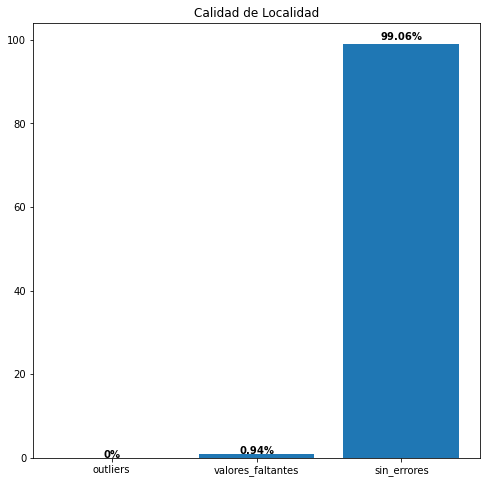

Porcentaje de valores faltantes en la columna Localidad es : 0.94 %
Porcentaje de outliers en la columna Localidad es : 0 %
Porcentaje de valores sin error en la columna Localidad es : 99.06 %
---------------------------------------------------


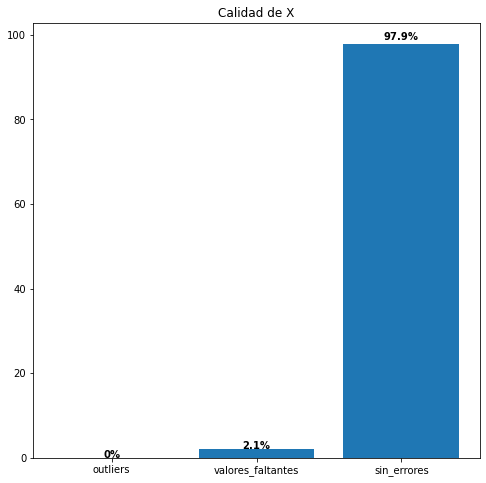

Porcentaje de valores faltantes en la columna X es : 2.1 %
Porcentaje de outliers en la columna X es : 0 %
Porcentaje de valores sin error en la columna X es : 97.9 %
---------------------------------------------------


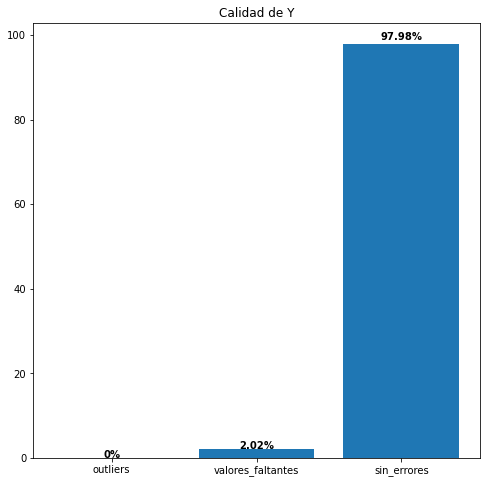

Porcentaje de valores faltantes en la columna Y es : 2.02 %
Porcentaje de outliers en la columna Y es : 0 %
Porcentaje de valores sin error en la columna Y es : 97.98 %
---------------------------------------------------


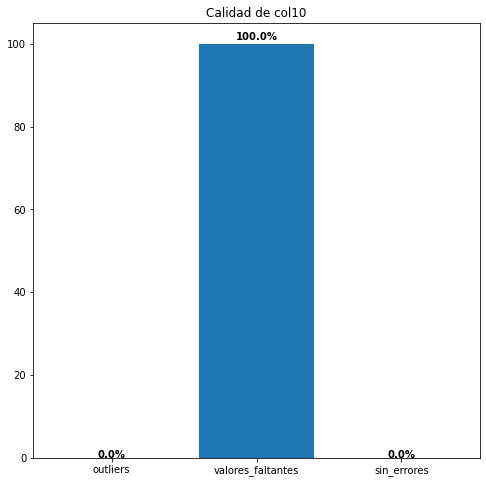

Porcentaje de valores faltantes en la columna col10 es : 100.0 %
Porcentaje de outliers en la columna col10 es : 0.0 %
Porcentaje de valores sin error en la columna col10 es : 0.0 %
---------------------------------------------------


In [250]:
analisis_csv(clientes_csv)

In [251]:
clientes_csv['ID'].isnull().sum() * 100 / clientes_csv['ID'].count()

0.0

In [252]:
valores_faltantes = round((clientes_csv['col10'].isnull().sum() * 100) / len(clientes_csv),2) 
valores_faltantes

100.0

In [253]:
minimo = clientes_csv['Edad'].mean() - 3*clientes_csv['Edad'].std()
maximo = clientes_csv['Edad'].mean() + 3*clientes_csv['Edad'].std()

print(minimo)
print(maximo)

-3.630694471049445
84.03862860278596


In [254]:
id = 'ID'
clientes_csv[id][clientes_csv[id] < 84].count()

83

In [255]:
compra_csv.dtypes

IdCompra           int64
Fecha             object
Fecha_Año          int64
Fecha_Mes          int64
Fecha_Periodo      int64
IdProducto         int64
Cantidad           int64
Precio           float64
IdProveedor        int64
dtype: object

In [256]:
column = 'Edad'
outliers =  (((clientes_csv[column][clientes_csv[column] < minimo].count() + clientes_csv[column][clientes_csv[column] > maximo].count())) * 100) / clientes_csv[column].count()

outliers

0.0

In [257]:
column = 'Edad'
(clientes_csv[column].count() - (clientes_csv[column][clientes_csv[column] < minimo].count() + clientes_csv[column][clientes_csv[column] > maximo].count()))

2672

In [258]:
clientes_csv

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311",NaN
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199",NaN
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706",NaN
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,089381","-34,9444471",NaN
...,...,...,...,...,...,...,...,...,...,...
2667,2668,Córdoba,MARIA STELLA RIVAS,CALLE PUBLICA SANTA ELENA COLONIA TIROLESA - ...,4902756,23,COLONIA TIROLESA,"-64,07419272","-31,25881725",NaN
2668,2669,Córdoba,ANA GABRIELA RIVAS,CALLE PUBLICA S/NÂº LA ARCADIA,153580992,28,LA ARCADIA,"-64,07696886","-31,53338396",NaN
2669,2670,Córdoba,JAVIER ALONSO RIVEIRO,AVENIDA LIBERTADOR SAN MARTIN S/NÂº BOUWER,4993041,57,BOUWER,"-64,19298343","-31,55786125",NaN
2670,2671,Córdoba,JUAN MANUEL RODRIGUEZ,CALLE PUBLICA S/NÂ° EL GATEADO BARRIO EL GATE...,152768918,36,EL GATEADO,"-64,11681227","-31,32123448",NaN


In [259]:
localidades_csv['municipio_nombre'].value_counts()

Capital Federal       49
La Plata              31
General San Martín    29
San Rafael            27
Luján de Cuyo         24
                      ..
Palma Sola             1
Batavia                1
Colonia Raquel         1
Ibarlucea              1
Las Ovejas             1
Name: municipio_nombre, Length: 1614, dtype: int64

In [260]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [266]:
csv = clientes_csv

def eliminar_columna_vacia(csv): 
    for i in csv:
        columna_vacia = 0
        columna_vacia = csv[i].isnull().sum()/len(csv)
        if columna_vacia == 1:
            csv.drop(columns=i,inplace=True)

def normalizar_strings(csv):
    for i in csv:
        if csv[i].dtype == 'O':
            csv[i] = csv[i].str.title()

def llenar_nulos(csv):
    for i in csv:
        if csv[i].dtype == 'O':
            csv[i] = csv[i].fillna('Sin datos')
        else:
            csv[i] = csv[i].fillna(0)

def eliminar_duplicados(csv):
    for i in csv:
        csv[i].drop_duplicates(inplace=True)

def remplazar_coma_por_punto(csv):
    for i in csv:
        if csv[i].dtype == 'O':
            pass
        else:
            csv[i].re

In [262]:
eliminar_columna_vacia(csv)

In [263]:
llenar_nulos(csv)

In [264]:
normalizar_strings(csv)


In [273]:
eliminar_duplicados(csv)

In [278]:
float(42-52)

-10.0

In [274]:
csv.repl

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
0,1,Buenos Aires,Heber Joni Santana,Las Heras Y Bat. 24 De Febrero 4150 Rincon De...,42-5161,58,Loma Verde,"-58,81850307","-34,30997088"
1,2,Buenos Aires,Ana Sapriza,Pueyrredon Y Dupuy Ruta3 Km 52.500 S/N Bâº Lo...,49-7578,61,Santa Rosa,"-58,73073751","-34,93908311"
2,3,Buenos Aires,Fernando Luis Saralegui,Calderon De La Barca 498,49-3435,15,Torres,"-59,12794068","-34,43082199"
3,4,Buenos Aires,Manuela Sarasola,"Ruta 36 Km 45,500 S/N El Peligro",49-2883,29,Ruta Sol,"-58,14393954","-34,92052706"
4,5,Buenos Aires,Mario Raúl Sarasua,492 Y 186 S/N Colonia Urquiza,491-4608,34,Jose Melchor Romero,"-58,089381","-34,9444471"
...,...,...,...,...,...,...,...,...,...
2667,2668,Córdoba,Maria Stella Rivas,Calle Publica Santa Elena Colonia Tirolesa - ...,4902756,23,Colonia Tirolesa,"-64,07419272","-31,25881725"
2668,2669,Córdoba,Ana Gabriela Rivas,Calle Publica S/Nâº La Arcadia,153580992,28,La Arcadia,"-64,07696886","-31,53338396"
2669,2670,Córdoba,Javier Alonso Riveiro,Avenida Libertador San Martin S/Nâº Bouwer,4993041,57,Bouwer,"-64,19298343","-31,55786125"
2670,2671,Córdoba,Juan Manuel Rodriguez,Calle Publica S/Nâ° El Gateado Barrio El Gate...,152768918,36,El Gateado,"-64,11681227","-31,32123448"
